In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [9]:
random_df = pd.read_csv('./data/log_standard_4_08_to_4_21_pure.csv')
random_df.head(20)

,user_id,video_id,date,hourmin,time_ms,is_click,is_like,is_follow,is_comment,is_forward,is_hate,long_view,play_time_ms,duration_ms,profile_stay_time,comment_stay_time,is_profile_enter,is_rand,tab
0,0,1527,20220411,1900,1649675512388,0,0,0,0,0,0,0,1385,209900,0,0,0,0,1
1,0,7405,20220416,2000,1650111976017,0,0,0,0,0,0,0,0,65400,0,0,0,0,0
2,0,6026,20220420,1600,1650444367095,0,0,0,0,0,0,0,1405,170833,0,0,0,0,1
3,1,6354,20220411,1100,1649645295928,0,0,0,0,0,0,0,0,255160,0,0,0,0,8
4,1,3645,20220411,1100,1649648827559,0,0,0,0,0,0,0,1970,79733,0,0,0,0,1
5,1,4073,20220412,300,1649706052290,1,0,0,0,0,0,1,115607,114680,0,0,0,0,1
6,1,1725,20220412,400,1649706789917,1,0,0,0,0,0,1,158156,156433,0,0,0,0,1
7,1,3891,20220412,400,1649707373426,1,0,0,0,0,0,1,62093,173800,0,0,0,0,1
8,1,5606,20220412,400,1649708149549,0,0,0,0,0,0,0,0,109320,0,0,0,0,0
9,1,4352,20220417,1100,1650165081534,1,1,0,0,0,0,1,32486,12576,0,0,0,0,1


In [10]:
random_df.shape

(1141112, 19)

In [12]:
random_df['is_click'].value_counts()

0    612267
1    528845
Name: is_click, dtype: int64

In [5]:
video_basic_df = pd.read_csv('./data/video_features_basic_pure.csv')
video_basic_df.head(20)
# video_basic_df.info()

,video_id,author_id,video_type,upload_dt,upload_type,visible_status,video_duration,server_width,server_height,music_id,music_type,tag
0,0,7349781,NORMAL,2022-04-10,LongImport,0.0,87433.0,720.0,1280.0,9155697141,9.0,39
1,1,2103883,NORMAL,2022-04-10,Kmovie,0.0,218066.0,720.0,1280.0,6355810746,9.0,2
2,2,5067285,NORMAL,2022-04-09,ShortImport,0.0,9233.0,720.0,1280.0,6618412736,4.0,1
3,3,7048760,NORMAL,2022-04-11,Web,0.0,16433.0,720.0,1280.0,9161677205,9.0,7
4,4,8635271,NORMAL,2022-04-09,Web,0.0,38766.0,720.0,1280.0,9141092381,9.0,9
5,5,8367059,NORMAL,2022-04-10,Web,0.0,358016.0,960.0,720.0,9148581891,9.0,"20,43"
6,6,7242897,NORMAL,2022-04-09,Kmovie,0.0,114500.0,720.0,960.0,4130247268,9.0,3
7,7,7676925,NORMAL,2022-04-10,LongPicture,0.0,NaN,720.0,1440.0,6355540435,8.0,"20,67"
8,8,8496788,AD,2022-04-09,UNKNOWN,0.0,150366.0,720.0,1280.0,0,NaN,39
9,9,3499857,NORMAL,2022-04-10,LongImport,0.0,61933.0,720.0,1280.0,6812771090,9.0,"62,7"


In [21]:
video_basic_df['tag_length'] = video_basic_df['tag'].apply(lambda x:len(str(x).split(',')))
video_basic_df['tag_length'].value_counts()

1    5792
2    1759
3      32
Name: tag_length, dtype: int64

In [6]:
video_basic_df['tag'] = video_basic_df['tag'].apply(lambda x:str(x).split(','))
merged_list = set(video_basic_df['tag'].explode().tolist())
print(len(merged_list))

In [3]:
user_df = pd.read_csv('./data/user_features_pure.csv')
user_df.head(20)

,user_id,user_active_degree,is_lowactive_period,is_live_streamer,is_video_author,follow_user_num,follow_user_num_range,fans_user_num,fans_user_num_range,friend_user_num,...,onehot_feat8,onehot_feat9,onehot_feat10,onehot_feat11,onehot_feat12,onehot_feat13,onehot_feat14,onehot_feat15,onehot_feat16,onehot_feat17
0,0,full_active,0,1,1,514,500+,150,"[100,1k)",34,...,135,6,3,0,0.0,1.0,0.0,0.0,0.0,0.0
1,1,full_active,0,-124,1,457,"(250,500]",20,"[10,100)",3,...,283,6,2,2,1.0,0.0,1.0,0.0,0.0,0.0
2,2,full_active,0,-124,1,8,"(0,10]",26,"[10,100)",3,...,275,5,2,2,0.0,0.0,0.0,1.0,0.0,0.0
3,3,full_active,0,1,1,91,"(50,100]",2166,"[1k,5k)",14,...,118,6,2,2,1.0,0.0,0.0,0.0,0.0,0.0
4,4,full_active,0,-124,1,261,"(250,500]",10,"[10,100)",4,...,378,3,3,0,0.0,0.0,0.0,0.0,0.0,0.0
5,5,full_active,0,-124,1,15,"(10,50]",23,"[10,100)",2,...,101,5,3,0,1.0,0.0,1.0,0.0,0.0,0.0
6,6,full_active,0,-124,0,75,"(50,100]",26,"[10,100)",23,...,264,4,2,0,1.0,0.0,0.0,0.0,0.0,0.0
7,7,full_active,0,-124,1,2103,500+,56,"[10,100)",43,...,396,3,3,0,0.0,0.0,0.0,0.0,0.0,0.0
8,8,high_active,0,-124,1,265,"(250,500]",27,"[10,100)",12,...,188,3,3,0,0.0,0.0,0.0,0.0,0.0,0.0
9,9,high_active,0,-124,0,71,"(50,100]",0,0,0,...,400,5,0,0,1.0,0.0,0.0,0.0,0.0,0.0


In [21]:
import pandas as pd
category_features = (['user_id', 'weekday', 'hourmin', 'user_active_degree', 'is_lowactive_period', 'is_video_author',
                     'follow_user_num_range', 'friend_user_num_range', 'register_days_range'] +
                     [f'onehot_feat{i}' for i in range(18)] +
                     ['video_id', 'author_id', 'video_type', 'upload_type', 'visible_status', 'tag'])
continuous_features = ['duration_ms', 'server_width', 'server_height']
labels = ['is_click', 'is_like', 'is_follow', 'is_comment', 'is_forward', 'long_view', 'is_not_hate']
raw_df = pd.read_csv('./data/log_standard_4_08_to_4_21_pure.csv')
user_df = pd.read_csv('./data/user_features_pure.csv')
video_df = pd.read_csv('./data/video_features_basic_pure.csv')
raw_df = raw_df.merge(user_df, on=['user_id'])
raw_df = raw_df.merge(video_df, on=['video_id'])
# 处理时间
raw_df['hourmin'] = raw_df['hourmin'] // 100
# 加入星期几特征
raw_df['date'] = pd.to_datetime(raw_df['date'], format='%Y%m%d')
raw_df['weekday'] = raw_df['date'].dt.day_name()
# 处理视频时长
raw_df['duration_ms'] = raw_df['duration_ms'] // 100

# 处理tag
raw_df['tag'] = raw_df['tag'].apply(lambda x:str(x).split(',')[0])

# 处理hate标签
raw_df['is_not_hate'] = 1 - raw_df['is_hate']

In [25]:
def myHist(series, name, idx, fig, save=False):
    fig.add_subplot(len(labels), 3, idx)
    sns.histplot(series)
    plt.xlim(0, 1)
    # plt.title(name+' distribution')
    plt.xlabel(name)
    if save:
        plt.savefig('./figure/' + name + '_distribution.png')
    # plt.show()
def myQuantile(series, name, idx, fig, save=False):
    fig.add_subplot(len(labels), 3, idx)
    x = [i/1000 for i in range(1000)]
    y = [series.quantile(i) for i in x]
    plt.plot(x, y)
    plt.ylabel(name)
    if save:
        plt.savefig('./figure/' + name + '_quantile.png')
    # plt.show()
def myScatter(series, name, idx, fig, save=False):
    fig.add_subplot(len(labels), 3, idx)
    plt.scatter(list(range(len(series))), series.sort_values())
    plt.ylabel(name)
    if save:
        plt.savefig('./figure/' + name + '_scatter.png')
    # plt.show()

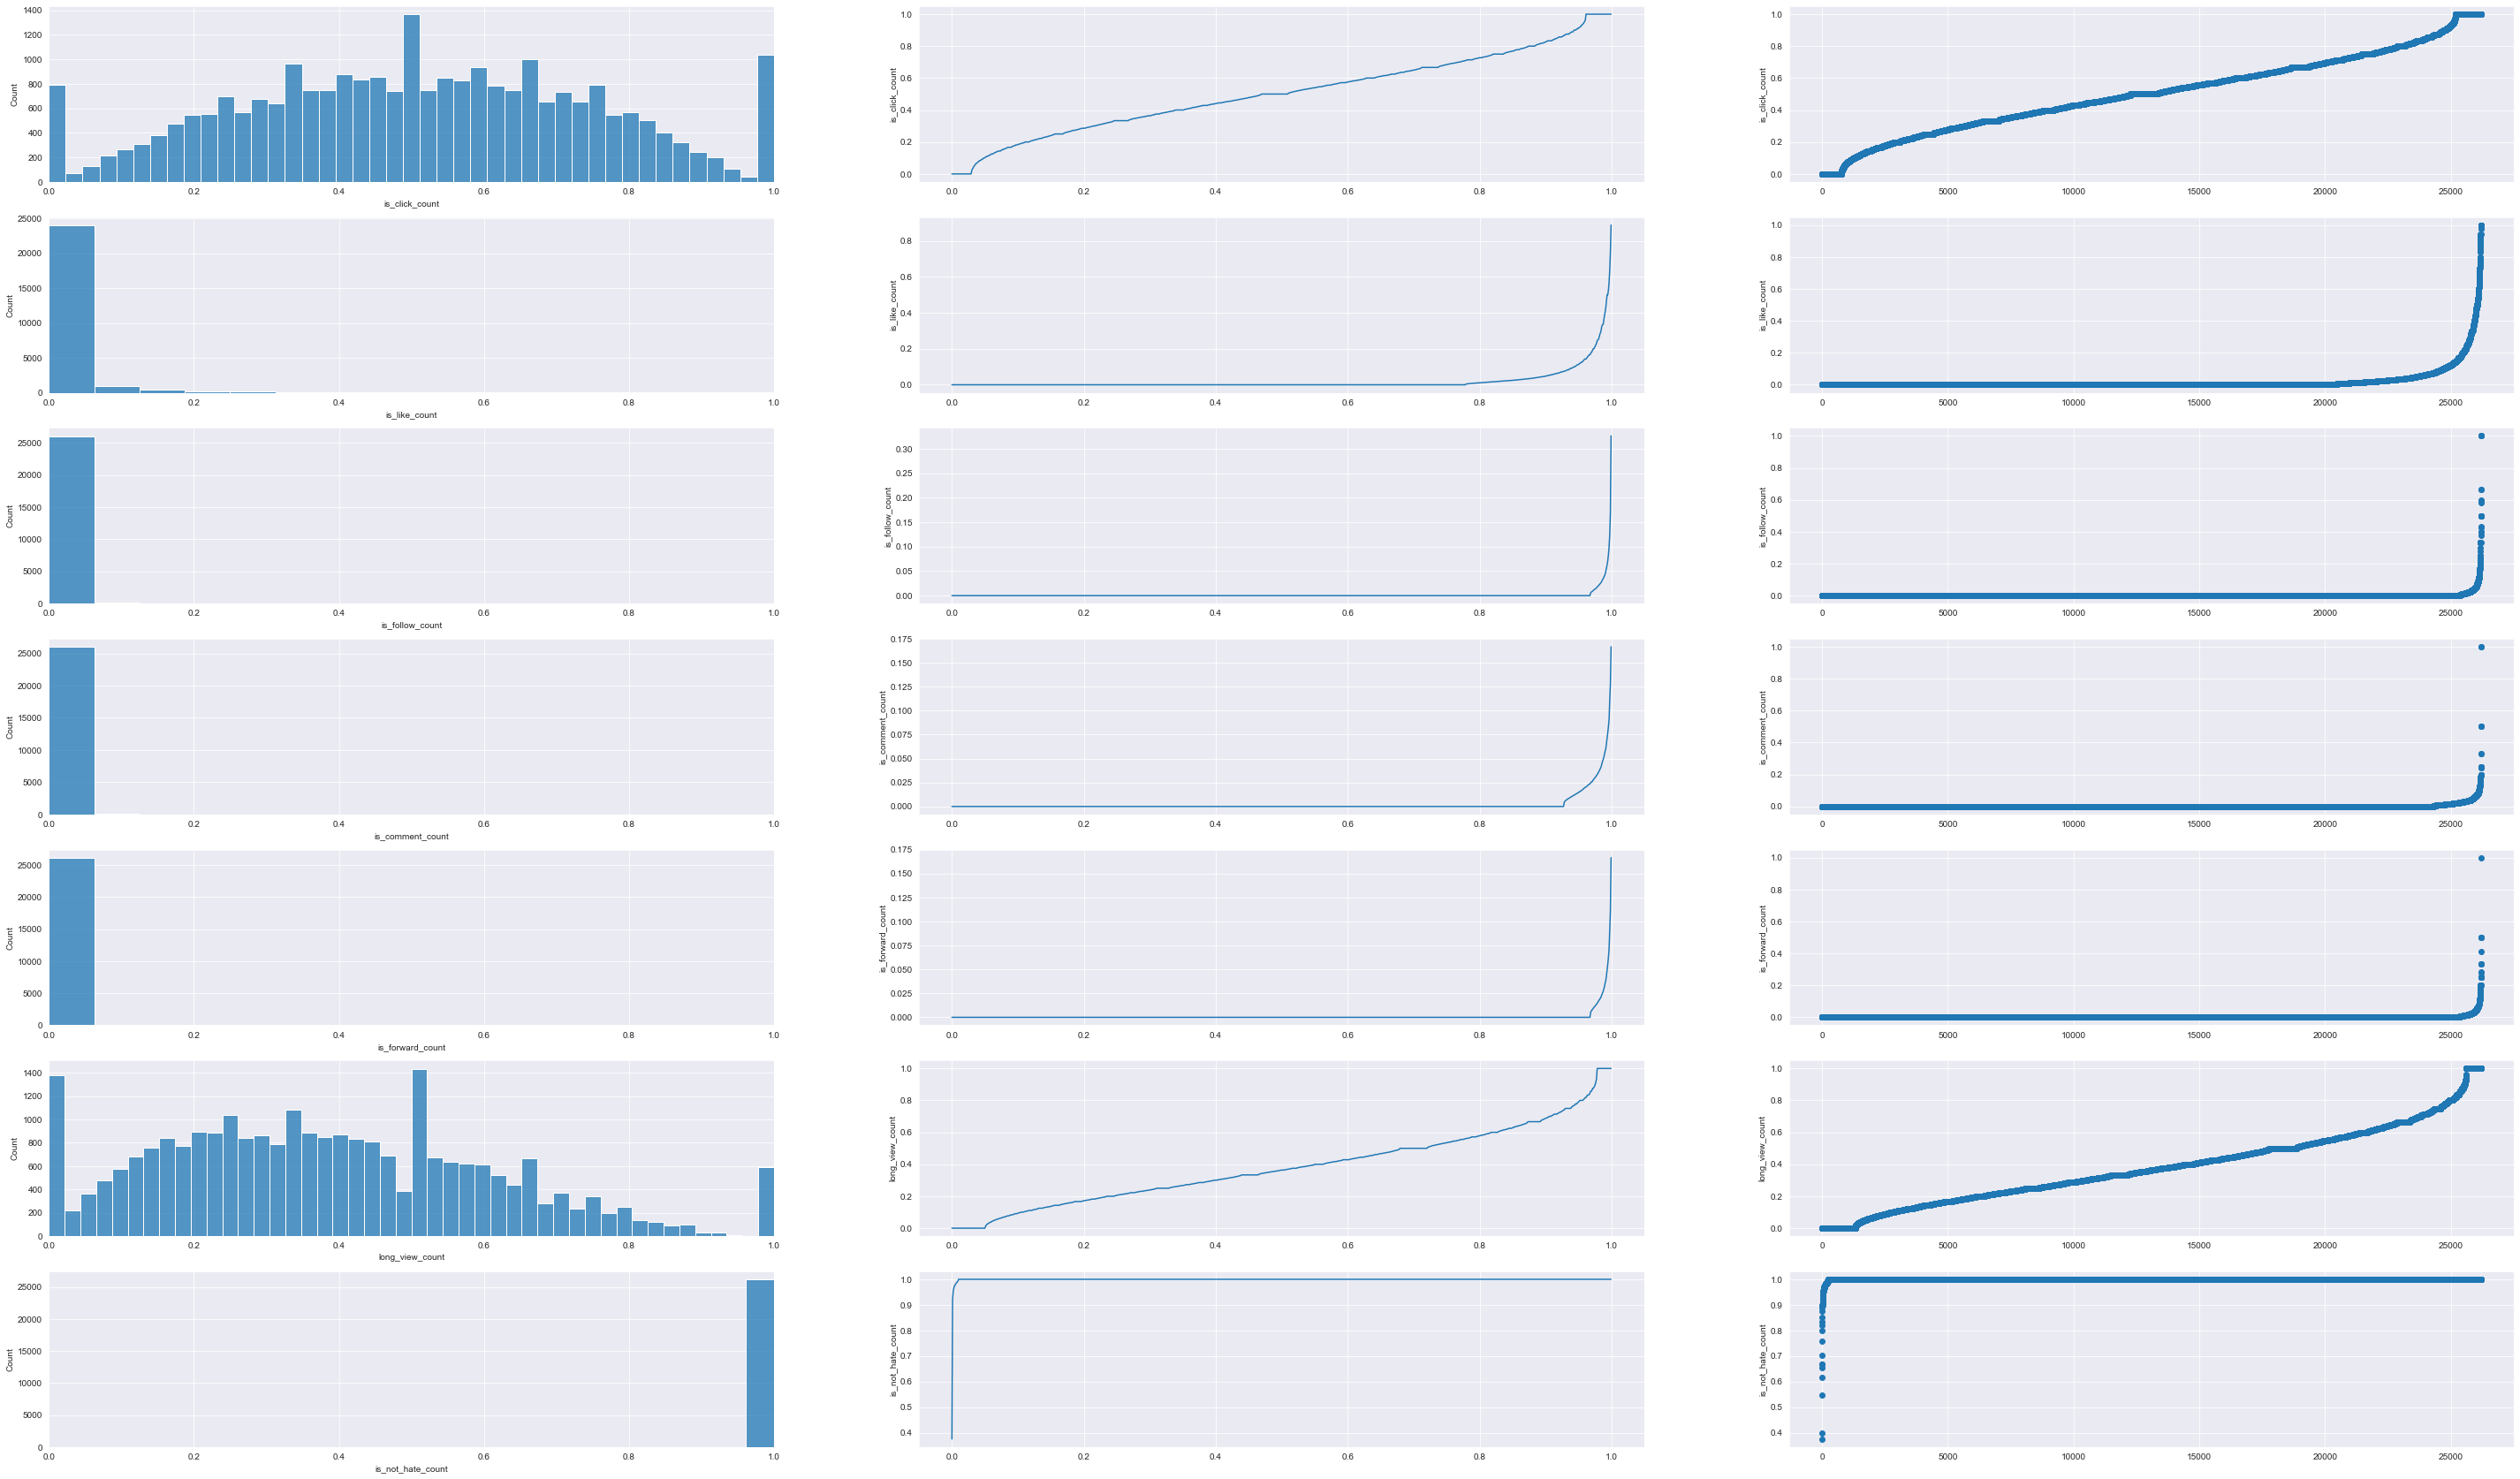

In [131]:
fig = plt.figure(figsize=(50, 30))
i = 0
high_xtr_user_set = dict()
low_xtr_user_set = dict()
for label in labels:
    count = raw_df.groupby("user_id")[label].mean()
    myHist(count, label+'_count', i+1, fig)
    myQuantile(count, label+'_count', i+2, fig)
    myScatter(count, label+'_count', i+3, fig)
    not_zero_count = count[count != 0]
    high_xtr_user_set[label] = set(not_zero_count[not_zero_count > not_zero_count.quantile(0.8)].index)
    low_xtr_user_set[label] = set(not_zero_count[not_zero_count < not_zero_count.quantile(0.2)].index)
    i += 3
plt.savefig('./data/figure/all.png')
plt.show()

In [28]:
count.describe()

,user_id,count,is_click,is_click_ratio,is_like,is_like_ratio,is_follow,is_follow_ratio,is_comment,is_comment_ratio,is_forward,is_forward_ratio,long_view,long_view_ratio,is_not_hate,is_not_hate_ratio
count,26210.000000,26210.000000,26210.000000,26210.000000,26210.000000,26210.000000,26210.000000,26210.000000,26210.000000,26210.000000,26210.000000,26210.000000,26210.000000,26210.000000,26210.000000,26210.000000
mean,13647.963182,43.537276,20.177222,0.506795,0.813125,0.020798,0.043838,0.001843,0.111789,0.002491,0.043342,0.001306,14.655513,0.382674,43.518962,0.999577
std,7883.085631,44.711028,20.040672,0.243931,3.110151,0.075812,0.328056,0.020473,0.508858,0.016077,0.411256,0.013425,14.857309,0.231389,44.693560,0.008789
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.375000
25%,6815.250000,13.000000,6.000000,0.333333,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,0.205882,13.000000,1.000000
50%,13641.500000,31.000000,14.000000,0.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,10.000000,0.363636,31.000000,1.000000
75%,20481.750000,59.000000,28.000000,0.684211,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,21.000000,0.534884,59.000000,1.000000
max,27284.000000,809.000000,219.000000,1.000000,65.000000,1.000000,23.000000,1.000000,14.000000,1.000000,36.000000,1.000000,155.000000,1.000000,809.000000,1.000000


In [31]:
len(high_xtr_user_set['is_like'])

5239

In [58]:
val_df = pd.read_csv('./data/save/val_predict_data.csv')

In [59]:
val_df.columns = category_features + continuous_features + labels + ['p_'+l for l in labels]
for col in category_features:
    val_df[col] = val_df[col].map(int)

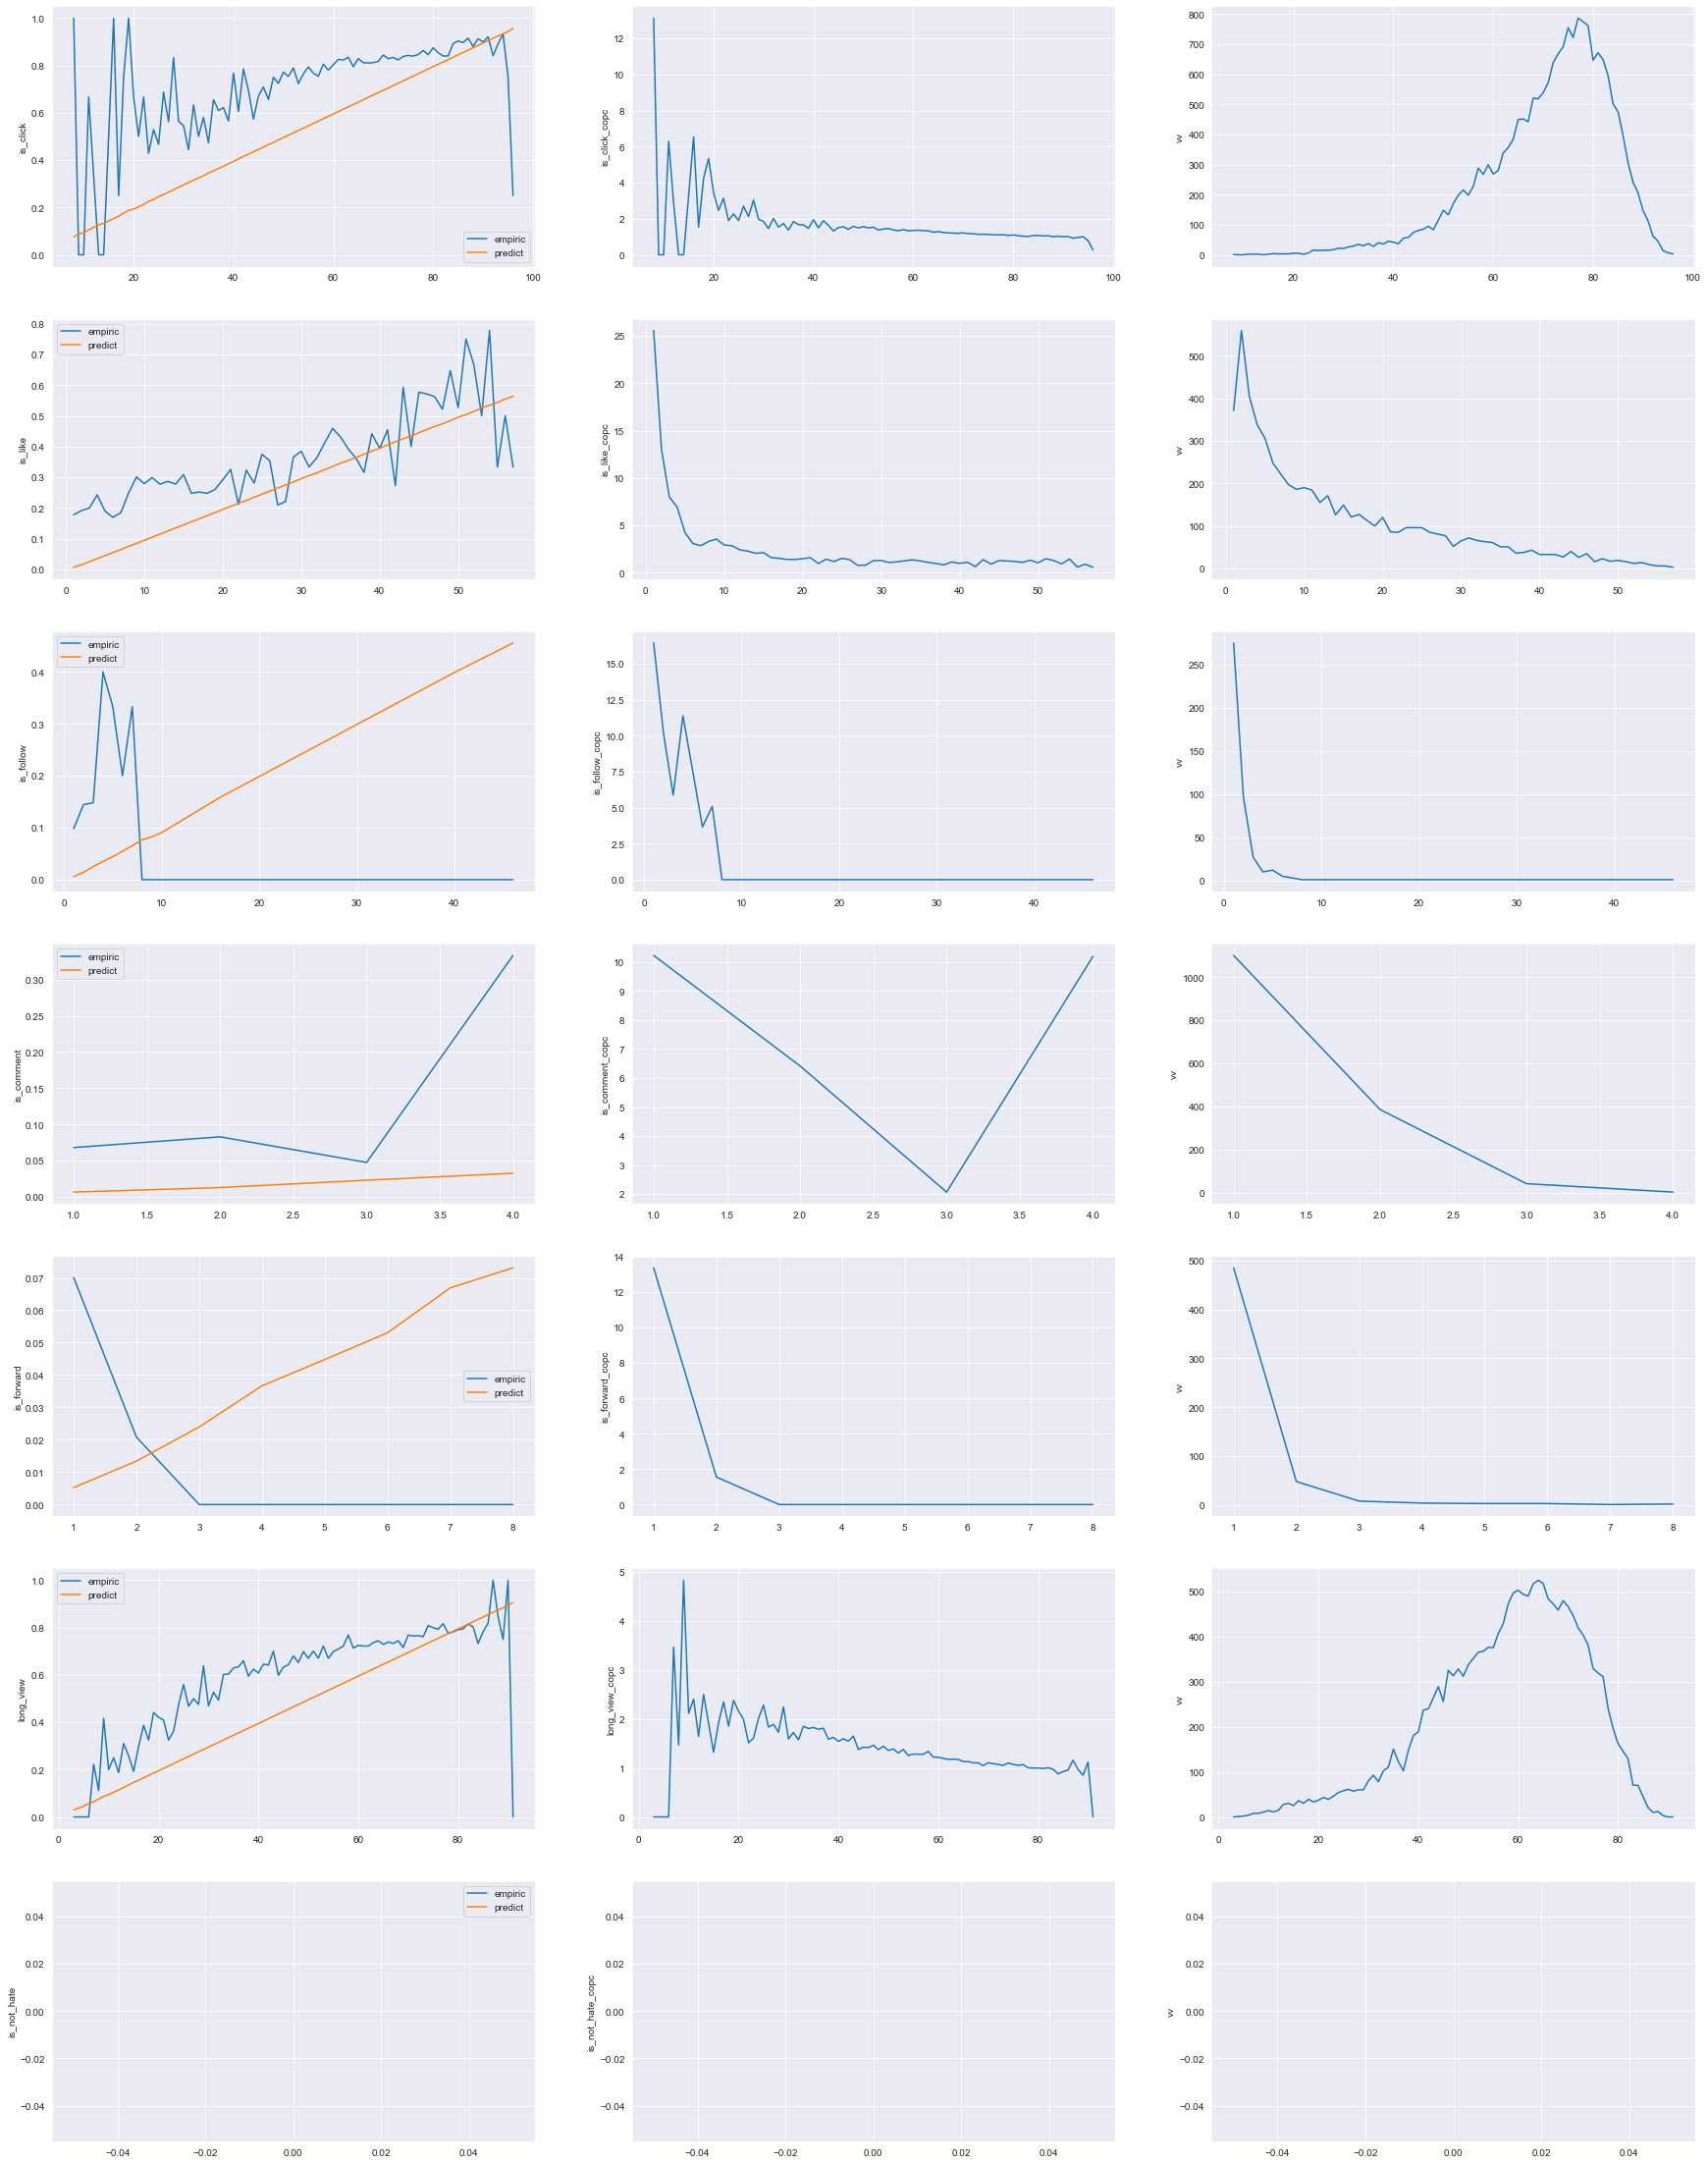

In [135]:
high_xtr_df_dict = dict()
fig = plt.figure(figsize=(30, 40))
copc_dict = dict()
for i, label in enumerate(labels):
    high_xtr_df_dict[label] = val_df.loc[val_df['user_id'].isin(high_xtr_user_set[label]), ['user_id', label, 'p_'+label]]
    high_xtr_df_dict[label]['x_label'] = np.ceil(high_xtr_df_dict[label]['p_'+label]*100)
    high_xtr_df_dict[label]['x_label'] = high_xtr_df_dict[label]['x_label'].map(int)
    copc_dict[label] = high_xtr_df_dict[label].groupby('x_label')[label].mean().reset_index()
    copc_dict[label].columns = ['x_label', 'emp_'+label]
    copc_dict[label] = copc_dict[label].merge(high_xtr_df_dict[label].groupby('x_label')['p_'+label].mean().reset_index(), on='x_label', how='left')
    vv = high_xtr_df_dict[label]['x_label'].value_counts().reset_index()
    vv.columns = ['x_label', 'vv']
    copc_dict[label] = copc_dict[label].merge(vv, on='x_label', how='left')
    copc_dict[label]['copc'] = copc_dict[label]['emp_'+label] / copc_dict[label]['p_'+label]
    # print(copc_dict[label])
    copc_dict[label] = copc_dict[label].sort_values('p_'+label)
    fig.add_subplot(len(labels), 3, 3*i+1)
    plt.plot(copc_dict[label]['x_label'], copc_dict[label]['emp_'+label], label='empiric')
    plt.plot(copc_dict[label]['x_label'], copc_dict[label]['p_'+label], label='predict')
    plt.ylabel(label)
    plt.legend()
    fig.add_subplot(len(labels), 3, 3*i+2)
    plt.plot(copc_dict[label]['x_label'], copc_dict[label]['copc'])
    plt.ylabel(label+'_copc')
    fig.add_subplot(len(labels), 3, 3*i+3)
    plt.plot(copc_dict[label]['x_label'], copc_dict[label]['vv'])
    plt.ylabel('vv')
plt.savefig('./data/figure/copc.png')

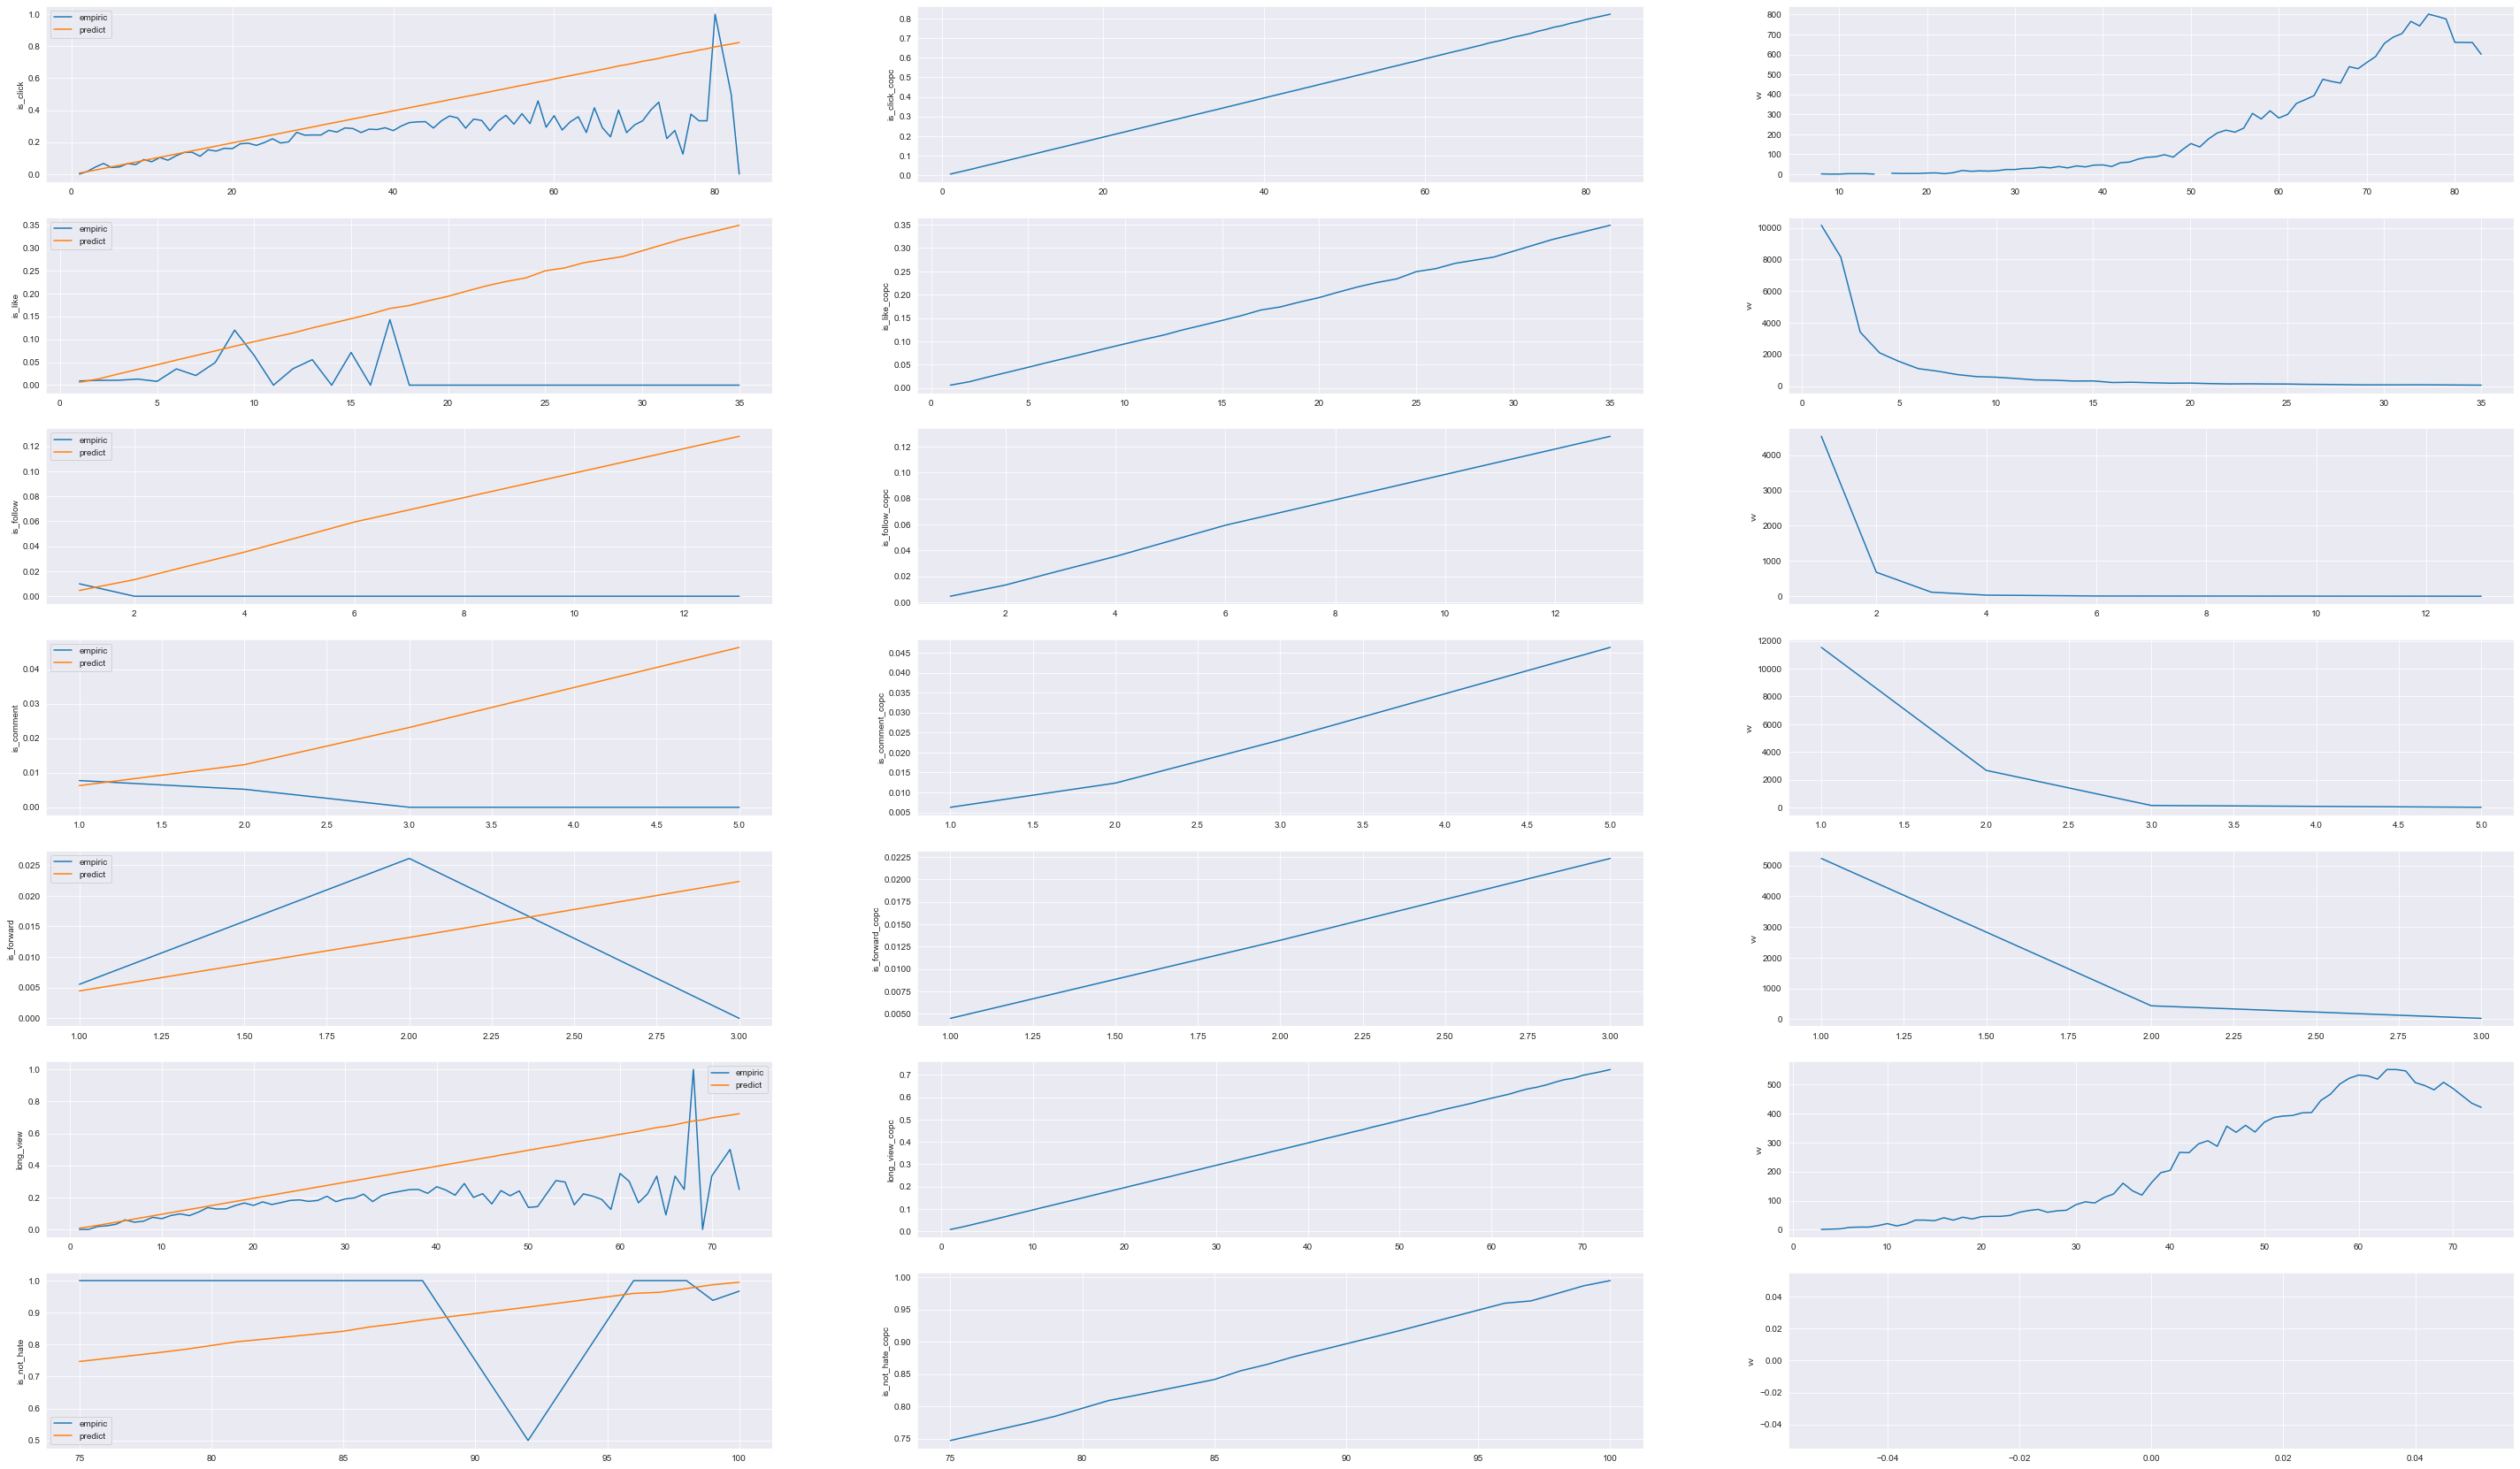

In [134]:
low_xtr_df_dict = dict()
fig = plt.figure(figsize=(50, 30))
copc_dict = dict()
for i, label in enumerate(labels):
    low_xtr_df_dict[label] = val_df.loc[val_df['user_id'].isin(low_xtr_user_set[label]), ['user_id', label, 'p_'+label]]
    low_xtr_df_dict[label]['x_label'] = np.ceil(low_xtr_df_dict[label]['p_'+label]*100)
    low_xtr_df_dict[label]['x_label'] = low_xtr_df_dict[label]['x_label'].map(int)
    copc_dict[label] = low_xtr_df_dict[label].groupby('x_label')[label].mean().reset_index()
    copc_dict[label].columns = ['x_label', 'emp_'+label]
    copc_dict[label] = copc_dict[label].merge(low_xtr_df_dict[label].groupby('x_label')['p_'+label].mean().reset_index(), on='x_label', how='left')
    vv = high_xtr_df_dict[label]['x_label'].value_counts().reset_index()
    vv.columns = ['x_label', 'vv']
    copc_dict[label] = copc_dict[label].merge(vv, on='x_label', how='left')
    copc_dict[label]['copc'] = copc_dict[label]['emp_'+label] / copc_dict[label]['p_'+label]
    copc_dict[label] = copc_dict[label].sort_values('p_'+label)
    fig.add_subplot(len(labels), 3, 3*i+1)
    plt.plot(copc_dict[label]['x_label'], copc_dict[label]['emp_'+label], label='empiric')
    plt.plot(copc_dict[label]['x_label'], copc_dict[label]['p_'+label], label='predict')
    plt.ylabel(label)
    plt.legend()
    fig.add_subplot(len(labels), 3, 3*i+2)
    plt.plot(copc_dict[label]['x_label'], copc_dict[label]['p_'+label], label='predict')
    plt.ylabel(label+'_copc')
    fig.add_subplot(len(labels), 3, 3*i+3)
    plt.plot(copc_dict[label]['x_label'], copc_dict[label]['vv'])
    plt.ylabel('vv')
plt.savefig('./data/figure/low_xtr_copc.png')

In [133]:
print(low_xtr_user_set['is_like'])

{14338, 10243, 18438, 2057, 16396, 8205, 6159, 4113, 4114, 20499, 4116, 10260, 18454, 24599, 4120, 24602, 10267, 14363, 12321, 22561, 4133, 8233, 10281, 4141, 46, 10290, 18484, 53, 16438, 26677, 8251, 26683, 61, 6205, 12351, 18495, 22594, 68, 18500, 8262, 12359, 20550, 20553, 12363, 22605, 4177, 12370, 16468, 18523, 4188, 16476, 16480, 2149, 4198, 16486, 12393, 26730, 2155, 4204, 22638, 111, 22639, 22642, 121, 6267, 10364, 12412, 6270, 10370, 26754, 12429, 142, 14479, 16529, 12434, 18582, 157, 6302, 6303, 14499, 18595, 6309, 12454, 16551, 26791, 10412, 16557, 22706, 12467, 16566, 8379, 4285, 4286, 6336, 12481, 20674, 14531, 16580, 20679, 2250, 204, 26829, 206, 4303, 6352, 8398, 2261, 22744, 24793, 218, 6362, 6363, 2269, 22749, 226, 16611, 4327, 18667, 26860, 237, 18669, 16623, 20720, 26862, 10483, 14579, 16628, 26870, 24823, 4346, 6399, 14592, 8450, 12547, 4356, 16642, 16644, 26886, 18698, 269, 10510, 14607, 272, 8465, 16655, 14612, 2327, 10232, 8473, 10519, 10522, 6428, 12572, 10526, 